In [1]:
import matplotlib.pylab as plt 
%matplotlib inline
import numpy as np
import rubin_sim.maf_proto as maf
import pandas as pd
import sqlite3
import healpy as hp
import copy

from rubin_sim.data import get_baseline
from os.path import basename


In [2]:
# Read in the data, convert to a numpy array
db_file = get_baseline()
run_name = basename(db_file).replace('.db', '')
con = sqlite3.connect(db_file)
df = pd.read_sql('select * from observations;', con)
con.close()
visits_array = df.to_records(index=False)

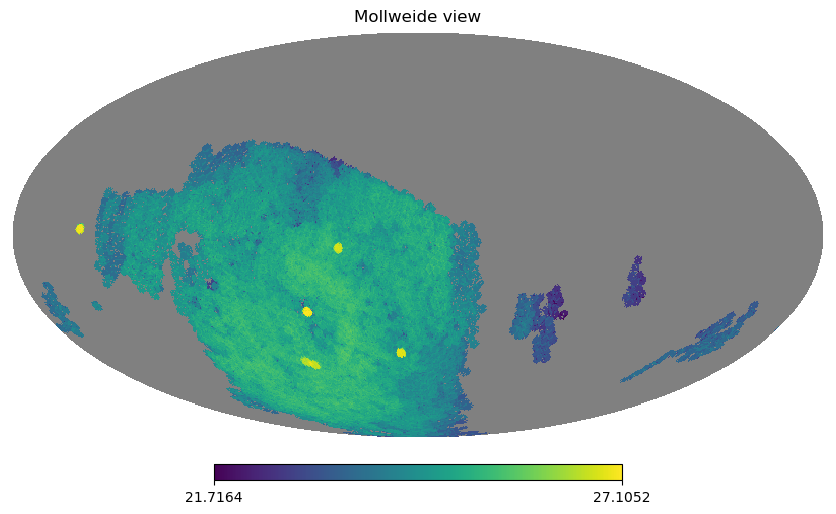

In [3]:
# Quick calc
sub_data = visits_array[np.where((visits_array["filter"] == "r") & (visits_array["night"] < 61))]
sl = maf.Slicer()
metric = maf.CoaddM5Metric("r")
# Run the metics through the slicer
hp_array = sl(sub_data, metric)
hp.mollview(hp_array)

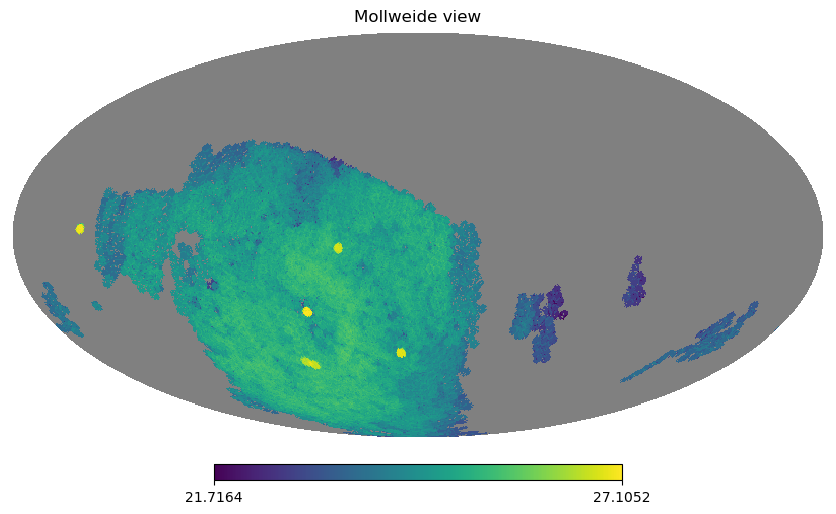

In [4]:
# You can do it as a one-liner!
hp.mollview(maf.Slicer()(visits_array[np.where((visits_array["filter"] == "r") &
                                               (visits_array["night"] < 61))],
                         maf.CoaddM5Metric("r")))

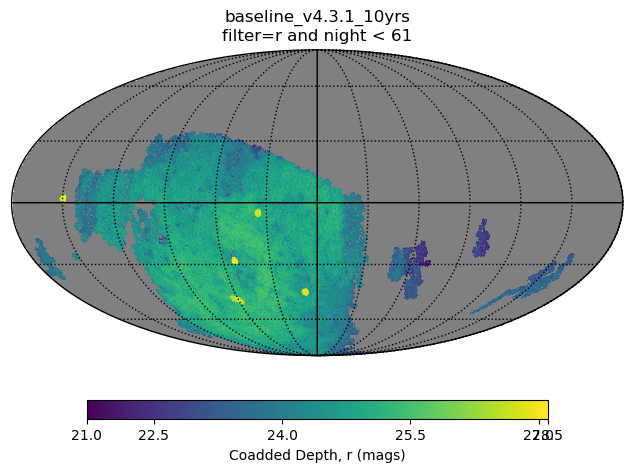

In [5]:
fig_saver = maf.FigSaver(close_figs=False)
# If we want to use some automated label generation 
info = {"run_name": run_name}
filtername = "r"
night_limit = 61
sub_data = visits_array[np.where((visits_array["filter"] == filtername) & (visits_array["night"] < night_limit))]
info['observations_subset'] = "filter=%s and night < %i" % (filtername, night_limit)
sl = maf.Slicer()
metric = maf.CoaddM5Metric("r")
# Run the metics through the slicer
hp_array, info = sl(sub_data, metric, info=info)
pm = maf.PlotMoll(info=info)
fig = pm(hp_array)
# To save a fig
fig_saver(fig, info)
# Compute a summary stat
summary_row = maf.gen_summary_row(info, "median", np.nanmedian(hp_array))

In [6]:
pd.Series(summary_row).to_frame().T

,run_name,observations_subset,slicer: nside,metric: name,metric: col,metric: unit,summary_name,value
0,baseline_v4.3.1_10yrs,filter=r and night < 61,128,CoaddM5Metric,fiveSigmaDepth,"Coadded Depth, r (mags)",median,24.729426


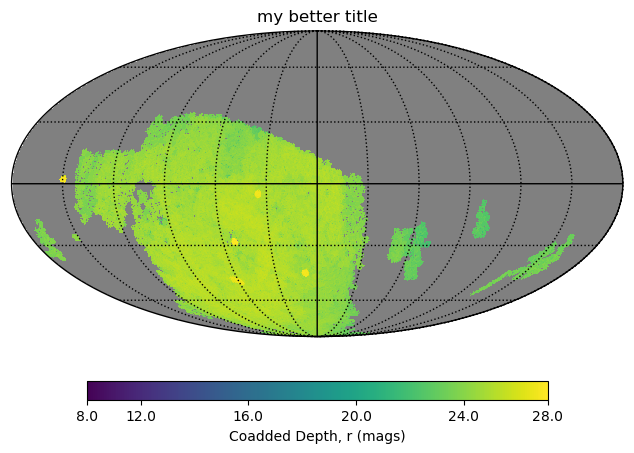

In [7]:
fig = pm(hp_array, title='my better title', min=10)

In [8]:
help(pm)

Help on PlotMoll in module rubin_sim.maf_proto.plots.plots object:

class PlotMoll(BasePlot)
 |  PlotMoll(info=None)
 |
 |  Plot a mollweild projection of a HEALpix array.
 |
 |  Method resolution order:
 |      PlotMoll
 |      BasePlot
 |      builtins.object
 |
 |  Methods defined here:
 |
 |  __call__(self, inarray, fig=None, add_grat=True, grat_params='default', cb_params='default', log=False, **kwargs)
 |      Parameters
 |      ----------
 |      inarray : `np.array`
 |          numpy array with proper HEALpix size.
 |      fig : `matplotlib.Figure`
 |          A matplotlib figure object. Default of None
 |          creates a new figure.
 |      add_grat : `bool`
 |          Add gratacule to the plot. Default True.
 |      grat_params : `dict`
 |          Dictionary of kwargs to pass to healpy.graticule.
 |          Default of "default" generates a reasonable dict.
 |      cb_params : `dict`
 |          Dictionary of color bar parameters. Default of "default"
 |          uses Pl

In [9]:
# If I want the median slew time
info = {"run_name": run_name, "observation_subset": "all"}
summary_row = maf.gen_summary_row(info, "median slewtime", np.median(visits_array["slewTime"]))
pd.Series(summary_row).to_frame().T

,run_name,observation_subset,summary_name,value
0,baseline_v4.3.1_10yrs,all,median slewtime,5.025164


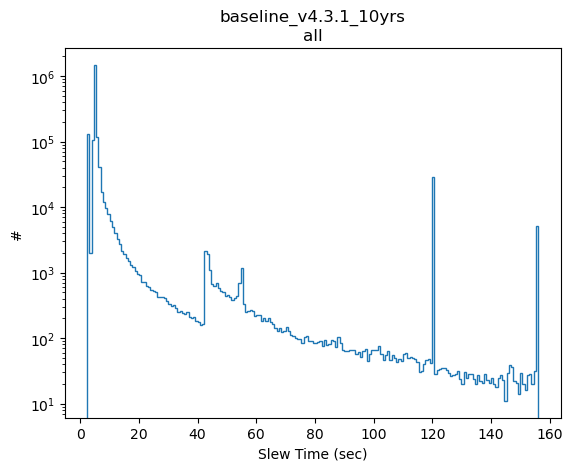

In [10]:
# Plot up a histogram
info = {"run_name": run_name, "metric: unit": "Slew Time (sec)", 
        "observations_subset": "all", "metric: name": "slew time"}
# Maybe this is just a function and not a class
ph = maf.PlotHist(info=info)
fig = ph(visits_array["slewTime"], log=True)
fig_saver(fig, info=info)

Loading  /Users/yoachim/rubin_sim_data/maf/SNe_data/LC_-2.0_0.2_380.0_800.0_ebvofMW_0.0_vstack.hdf5 g 20774 799 26


/Users/yoachim/anaconda3/envs/rubin12/lib/python3.12/site-packages/numpy/_core/fromnumeric.py:868: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  a.partition(kth, axis=axis, kind=kind, order=order)


Loading  /Users/yoachim/rubin_sim_data/maf/SNe_data/LC_-2.0_0.2_380.0_800.0_ebvofMW_0.0_vstack.hdf5 i 78302 799 98
Loading  /Users/yoachim/rubin_sim_data/maf/SNe_data/LC_-2.0_0.2_380.0_800.0_ebvofMW_0.0_vstack.hdf5 r 50337 799 63
Loading  /Users/yoachim/rubin_sim_data/maf/SNe_data/LC_-2.0_0.2_380.0_800.0_ebvofMW_0.0_vstack.hdf5 y 63121 799 79
Loading  /Users/yoachim/rubin_sim_data/maf/SNe_data/LC_-2.0_0.2_380.0_800.0_ebvofMW_0.0_vstack.hdf5 z 73508 799 92
Loading  /Users/yoachim/rubin_sim_data/maf/SNe_data/LC_0.0_0.0_380.0_800.0_ebvofMW_0.0_vstack.hdf5 g 20774 799 26


/Users/yoachim/anaconda3/envs/rubin12/lib/python3.12/site-packages/numpy/_core/fromnumeric.py:868: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  a.partition(kth, axis=axis, kind=kind, order=order)


Loading  /Users/yoachim/rubin_sim_data/maf/SNe_data/LC_0.0_0.0_380.0_800.0_ebvofMW_0.0_vstack.hdf5 i 78302 799 98
Loading  /Users/yoachim/rubin_sim_data/maf/SNe_data/LC_0.0_0.0_380.0_800.0_ebvofMW_0.0_vstack.hdf5 r 50337 799 63
Loading  /Users/yoachim/rubin_sim_data/maf/SNe_data/LC_0.0_0.0_380.0_800.0_ebvofMW_0.0_vstack.hdf5 y 78302 799 98
Loading  /Users/yoachim/rubin_sim_data/maf/SNe_data/LC_0.0_0.0_380.0_800.0_ebvofMW_0.0_vstack.hdf5 z 88689 799 111


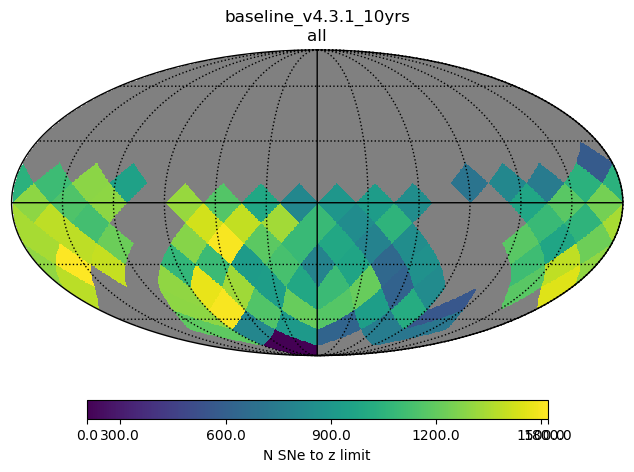

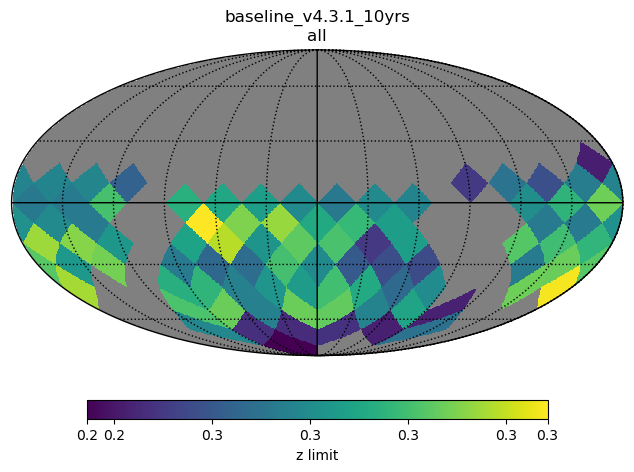

In [11]:
# for a metric that computes multiple things
summary_stats = []
nside = 4

info = maf.empty_info()
info["run_name"] = run_name
info["observations_subset"] = "all"
sl = maf.Slicer(nside=nside)
metric = maf.SNNSNMetric()
sn_array, info = sl(visits_array, metric, info=info)
pm = maf.PlotMoll(info=info)

fig = pm(sn_array["n_sn"], unit="N SNe to z limit")
fig_saver(fig, info=info)
fig = pm(sn_array["zlim"], unit="z limit")
fig_saver(fig, info=info)

summary_stats.append(maf.gen_summary_row(info, "sum N SNe", np.nansum(sn_array["n_sn"])))
summary_stats.append(maf.gen_summary_row(info, "mean z limit", np.nanmean(sn_array["zlim"])))
summary_stats.append(maf.gen_summary_row(info, "median z limit", np.nanmedian(sn_array["zlim"])))

In [12]:
pd.DataFrame.from_dict(summary_stats)

,run_name,metric: name,metric: col,observations_subset,slicer: nside,summary_name,value,caption
0,baseline_v4.3.1_10yrs,SNNSNMetric,,all,4,sum N SNe,92753.148060,
1,baseline_v4.3.1_10yrs,SNNSNMetric,,all,4,mean z limit,0.283610,
2,baseline_v4.3.1_10yrs,SNNSNMetric,,all,4,median z limit,0.282537,


In [13]:
# 
!ls maf_figs

CoaddM5Metric_fiveSigmaDepth_filter_r_and_night_lt_61_nside128_.pdf
maf_tracking.db
slew_time_all_.pdf
SNNSNMetric__all_nside4_.pdf
thumb_CoaddM5Metric_fiveSigmaDepth_filter_r_and_night_lt_61_nside128_.png
thumb_slew_time_all_.png
thumb_SNNSNMetric__all_nside4_.png
